Q3:Remove the interference pattern in the image ’astronaut-interference.tif’. Describe your
steps and include appropriate intermediate images/plots to motivate your filter or enhancement choice.

First display the original image

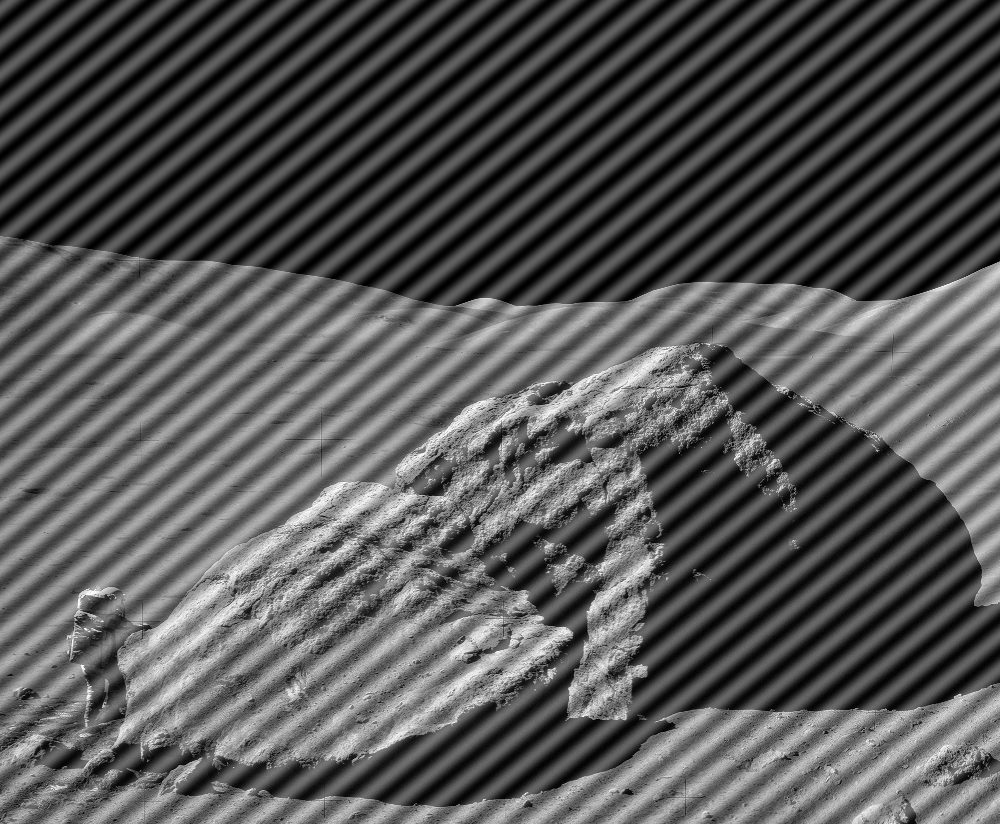

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
img = cv2.imread('astronaut-interference.tif')
cv2_imshow(img)

Display the fourier spectrum of the image and find the peaks

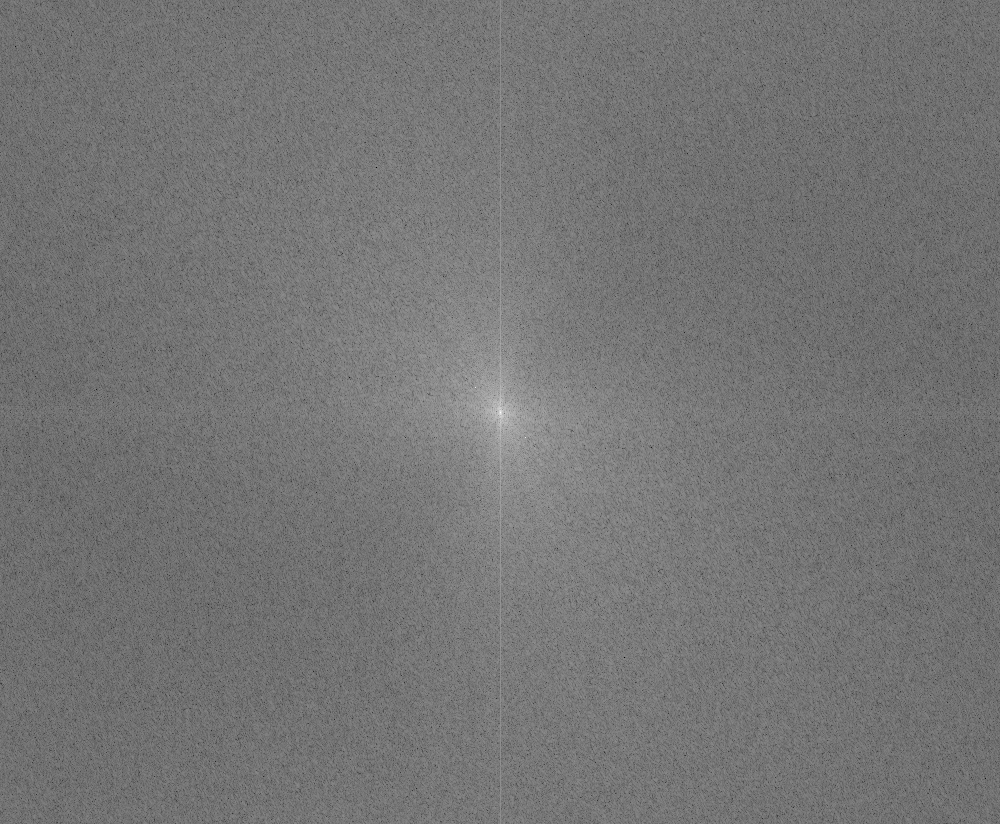

Dimensions of the magnitude variable: (824, 1000)
Highest element 1:
Index: 437525
Position: 437, 525
Value: 236

Highest element 2:
Index: 387475
Position: 387, 475
Value: 236

Highest element 3:
Index: 412500
Position: 412, 500
Value: 255



In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread("astronaut-interference.tif")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Compute the discrete Fourier Transform of the image
fourier = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero-frequency component to the center of the spectrum
fourier_shift = np.fft.fftshift(fourier)

# Calculate the magnitude of the Fourier Transform
magnitude = 20 * np.log(cv2.magnitude(fourier_shift[:, :, 0], fourier_shift[:, :, 1]))

# Scale the magnitude for display
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

# Display the magnitude of the Fourier Transform
cv2_imshow(magnitude)
magnitude
# Print the dimensions of the magnitude
print("Dimensions of the magnitude variable:", magnitude.shape)
indices = np.argpartition(magnitude, -3, axis=None)[-3:]

# Convert the indices to 2D coordinates
coordinates = np.unravel_index(indices, magnitude.shape)

# Get the values at the highest three elements
values = magnitude[coordinates]

# Print the indices, positions, and corresponding values
for i in range(3):
    print(f"Highest element {i + 1}:")
    print(f"Index: {indices[i]}")
    print(f"Position: {coordinates[0][i]}, {coordinates[1][i]}")
    print(f"Value: {values[i]}\n")

Design a notch filter using the peaks obtained in previous part and multiply it and take IDFT to get the final filtered
image

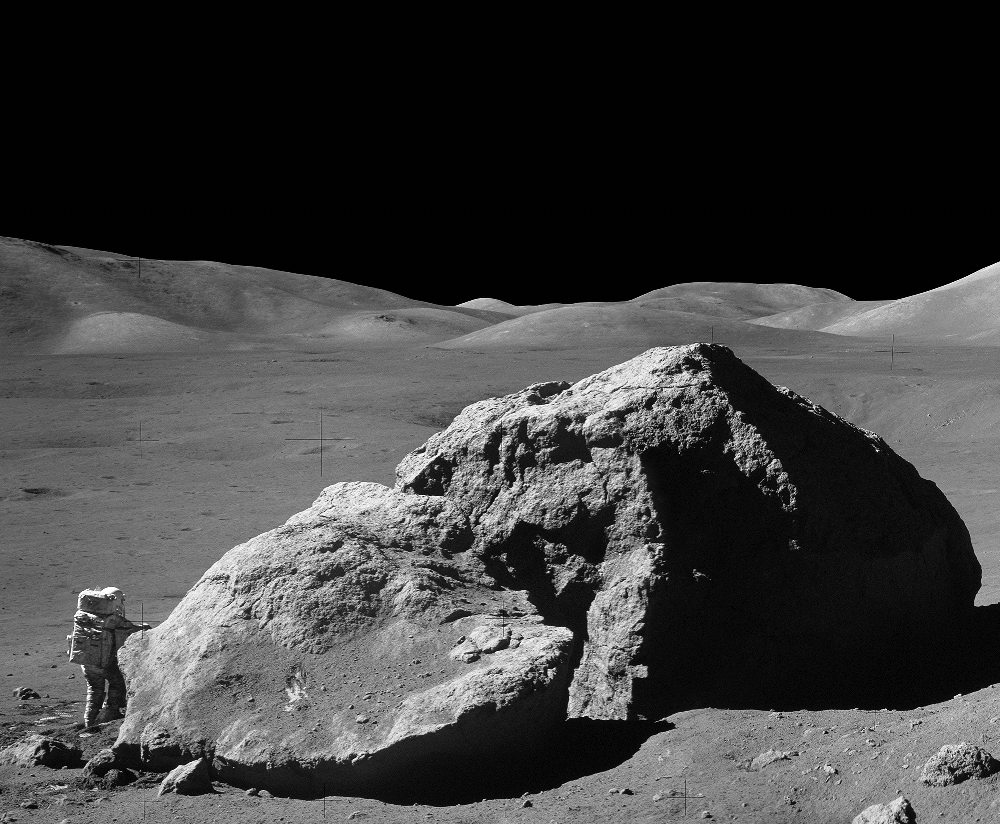

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread("astronaut-interference.tif")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Compute the discrete Fourier Transform of the image
fourier = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero-frequency component to the center of the spectrum
fourier_shift = np.fft.fftshift(fourier)

# Define the coordinates of the interference peaks
# You'll need to replace these with the appropriate coordinates
peaks = [( 437, 525), (387, 475)]

# Create a mask for the notch filter
mask = np.ones_like(gray, dtype=np.float64)
for peak in peaks:
    mask[peak] = 0

# Apply the notch filter
fourier_shift[:, :, 0] *= mask
fourier_shift[:, :, 1] *= mask

# Shift the zero-frequency component back to its original position
fourier_ishift = np.fft.ifftshift(fourier_shift)

# Compute the inverse Fourier Transform
image_filtered = cv2.idft(fourier_ishift)
image_filtered = cv2.magnitude(image_filtered[:, :, 0], image_filtered[:, :, 1])

# Normalize the filtered image for display
image_filtered = cv2.normalize(image_filtered, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

# Display the filtered image
cv2_imshow(image_filtered)


Fourier transform of deblurred image (it can be seen that the two  peaks are now removed)

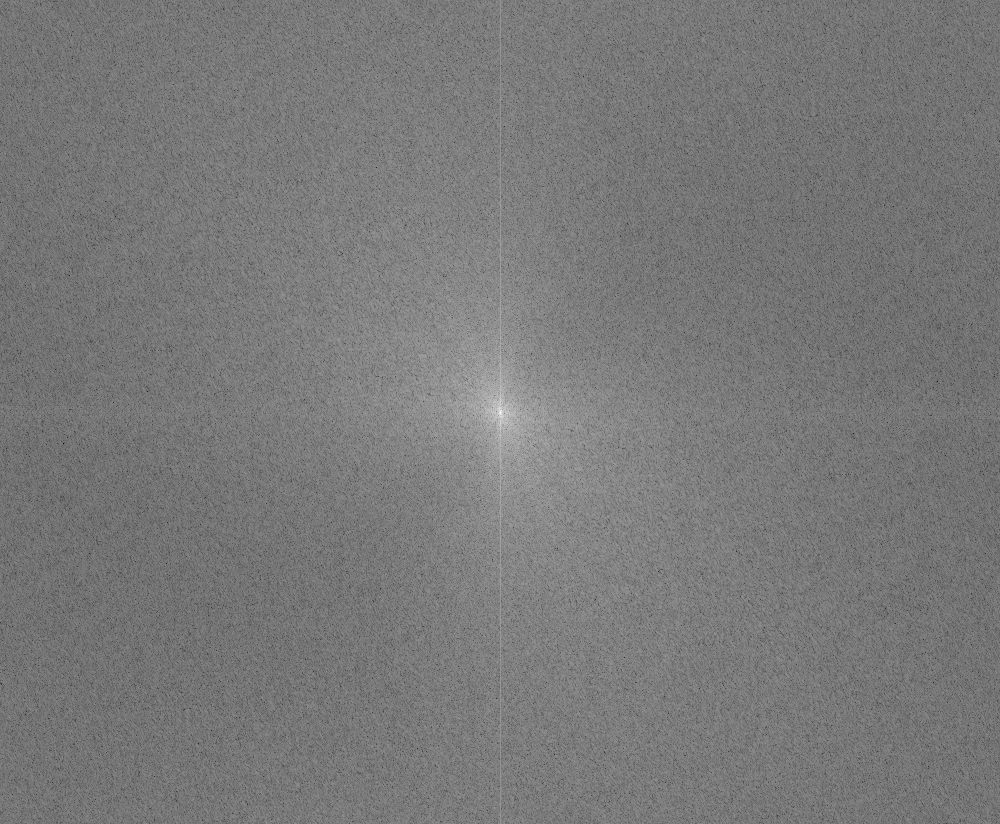

Dimensions of the magnitude variable: (824, 1000)
Highest element 1:
Index: 413500
Position: 413, 500
Value: 239

Highest element 2:
Index: 412500
Position: 412, 500
Value: 255

Highest element 3:
Index: 411500
Position: 411, 500
Value: 239



In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image




# Compute the discrete Fourier Transform of the image
fourier = cv2.dft(np.float32(image_filtered), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero-frequency component to the center of the spectrum
fourier_shift = np.fft.fftshift(fourier)

# Calculate the magnitude of the Fourier Transform
magnitude = 20 * np.log(cv2.magnitude(fourier_shift[:, :, 0], fourier_shift[:, :, 1]))

# Scale the magnitude for display
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

# Display the magnitude of the Fourier Transform
cv2_imshow(magnitude)
magnitude
# Print the dimensions of the magnitude
print("Dimensions of the magnitude variable:", magnitude.shape)
indices = np.argpartition(magnitude, -3, axis=None)[-3:]

# Convert the indices to 2D coordinates
coordinates = np.unravel_index(indices, magnitude.shape)

# Get the values at the highest three elements
values = magnitude[coordinates]

# Print the indices, positions, and corresponding values
for i in range(3):
    print(f"Highest element {i + 1}:")
    print(f"Index: {indices[i]}")
    print(f"Position: {coordinates[0][i]}, {coordinates[1][i]}")
    print(f"Value: {values[i]}\n")

The mask(notch filter) is shown

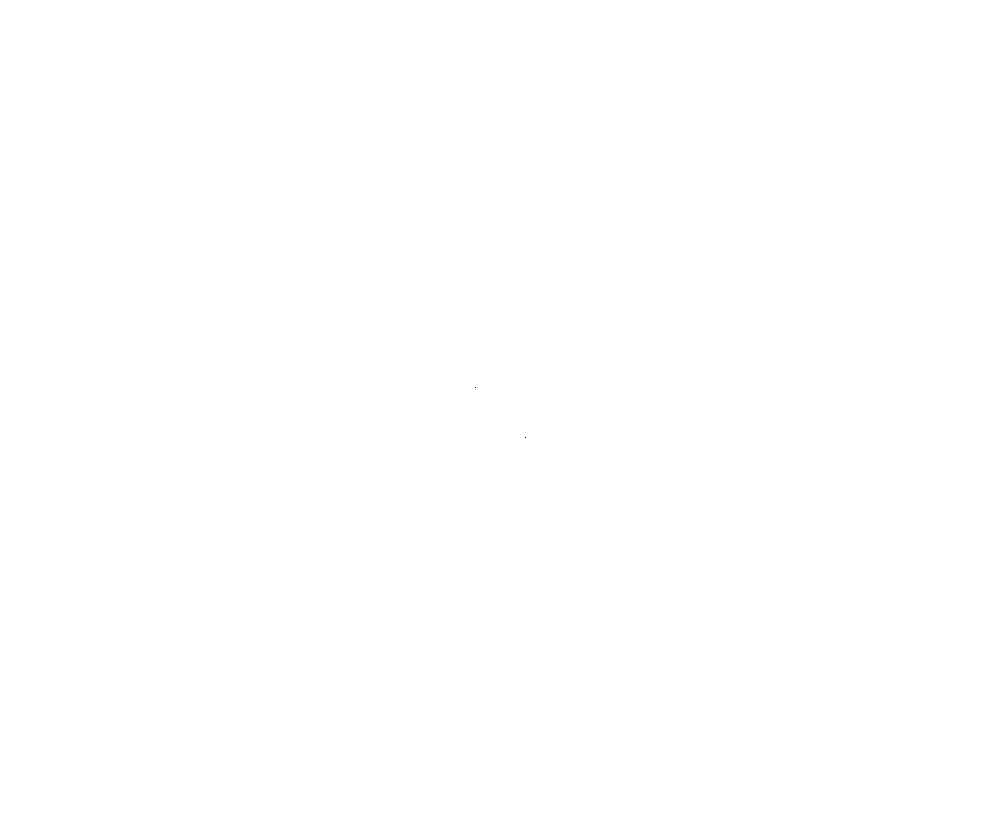

In [ ]:
cv2_imshow(mask * 255)

Q4:Consider the image ’car motion blur.jpg’. The original image has been blurred using a motion
blur kernel. Try restoring the original image. You can experiment with simple motion blur kernels of various
sizes.

Display the original image

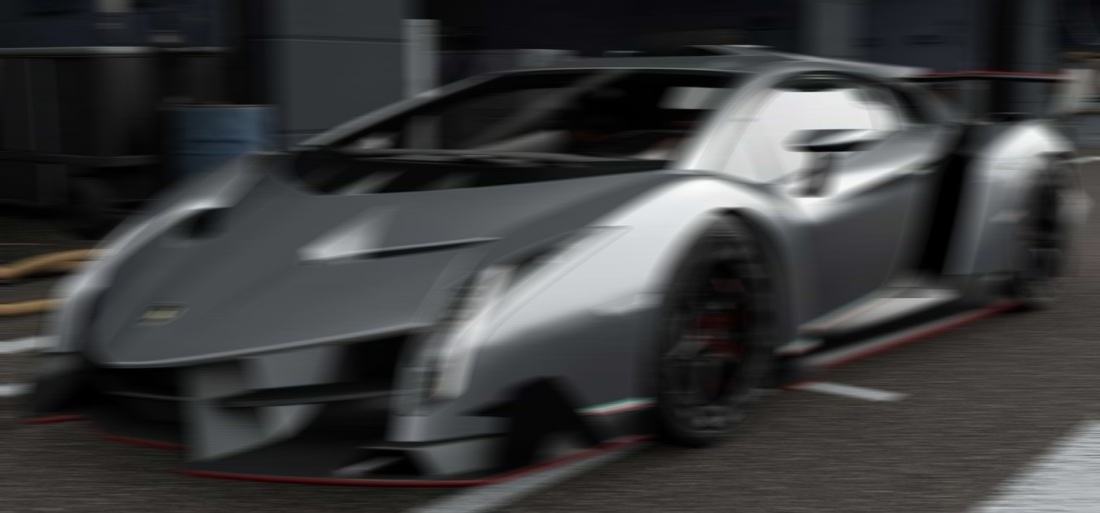

(513, 1100, 3)

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
img2 = cv2.imread('car_motion_blur.jpg')
cv2_imshow(img2)
img2.shape

Find H(u,v)

In [ ]:
u = np.fft.fftfreq(1100)[None, :]
v = np.fft.fftfreq(513)[:, None]
T = 1
a = 0.1
b = 0.1
c = np.pi * (u * a + v * b)  # common part
transfer = T / c * np.sin(c) * np.exp(1j * c)
transfer[c == 0] = 1  # this is where the division by 0 happened
transfer.shape

<ipython-input-55-4b1d9e54e741>:7: RuntimeWarning: divide by zero encountered in divide
  transfer = T / c * np.sin(c) * np.exp(1j * c)
<ipython-input-55-4b1d9e54e741>:7: RuntimeWarning: invalid value encountered in multiply
  transfer = T / c * np.sin(c) * np.exp(1j * c)


(513, 1100)

Find weiner filter transfer function and deconvolve it to get original image by tweaking K

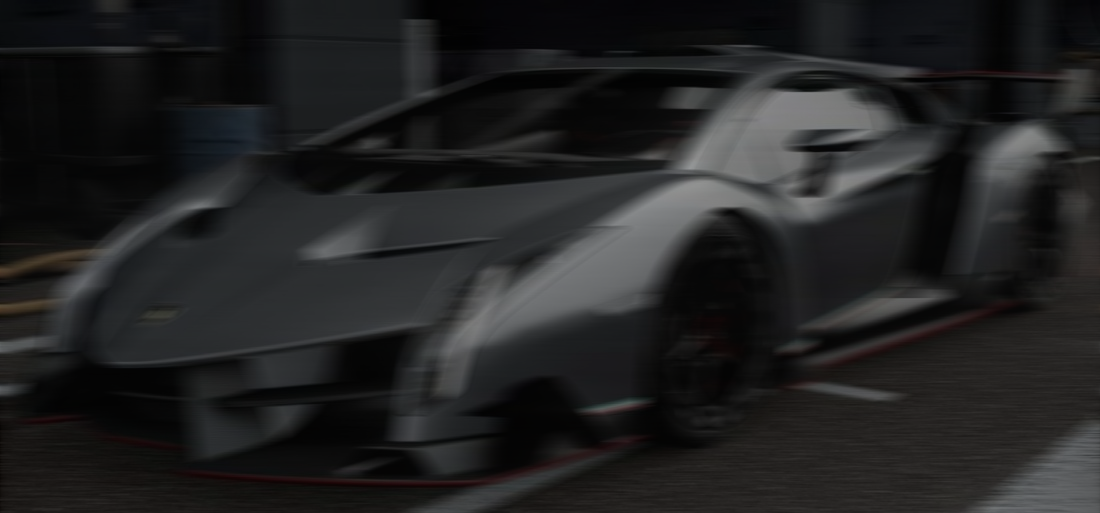

In [ ]:
transfer_func = transfer
K=0.4

constant = K
H_abs_sq= np.multiply(np.conjugate(transfer_func),transfer_func)
blurred_image = img2
blurred_image_fft = np.fft.fft2(blurred_image)
blurred_image_fft_shift = np.fft.fftshift(blurred_image_fft)
fft_rows = blurred_image_fft_shift.shape[0]
fft_cols = blurred_image_fft_shift.shape[1]
first_func = np.zeros((fft_rows,fft_cols), dtype = complex)

denom = np.multiply(np.add(H_abs_sq,constant),transfer_func)
for i in range(fft_rows):
    for k in range(fft_cols):
        if denom[i][k] != 0+0*1j:
            first_func[i][k] = H_abs_sq[i][k]/denom[i][k]
blurred_image_fft_shift[:, :, 0] *= first_func
blurred_image_fft_shift[:, :, 1] *= first_func
blurred_image_fft_shift[:, :, 2] *= first_func
unblurred_image_f= blurred_image_fft_shift
unblurred_image_f_reshift = np.fft.ifftshift(unblurred_image_f)
unblurred_image = np.fft.ifft2(unblurred_image_f_reshift)
unblurred_image_abs = np.abs(unblurred_image)

cv2_imshow(unblurred_image_abs)